<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
house = pd.read_csv('/Users/reemtahir/Desktop/DSI-SF-4/datasets/housing_regression/housing.csv')

In [4]:
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
house.shape

(1460, 81)

In [46]:
house.info() #no cleaning necesary, for now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

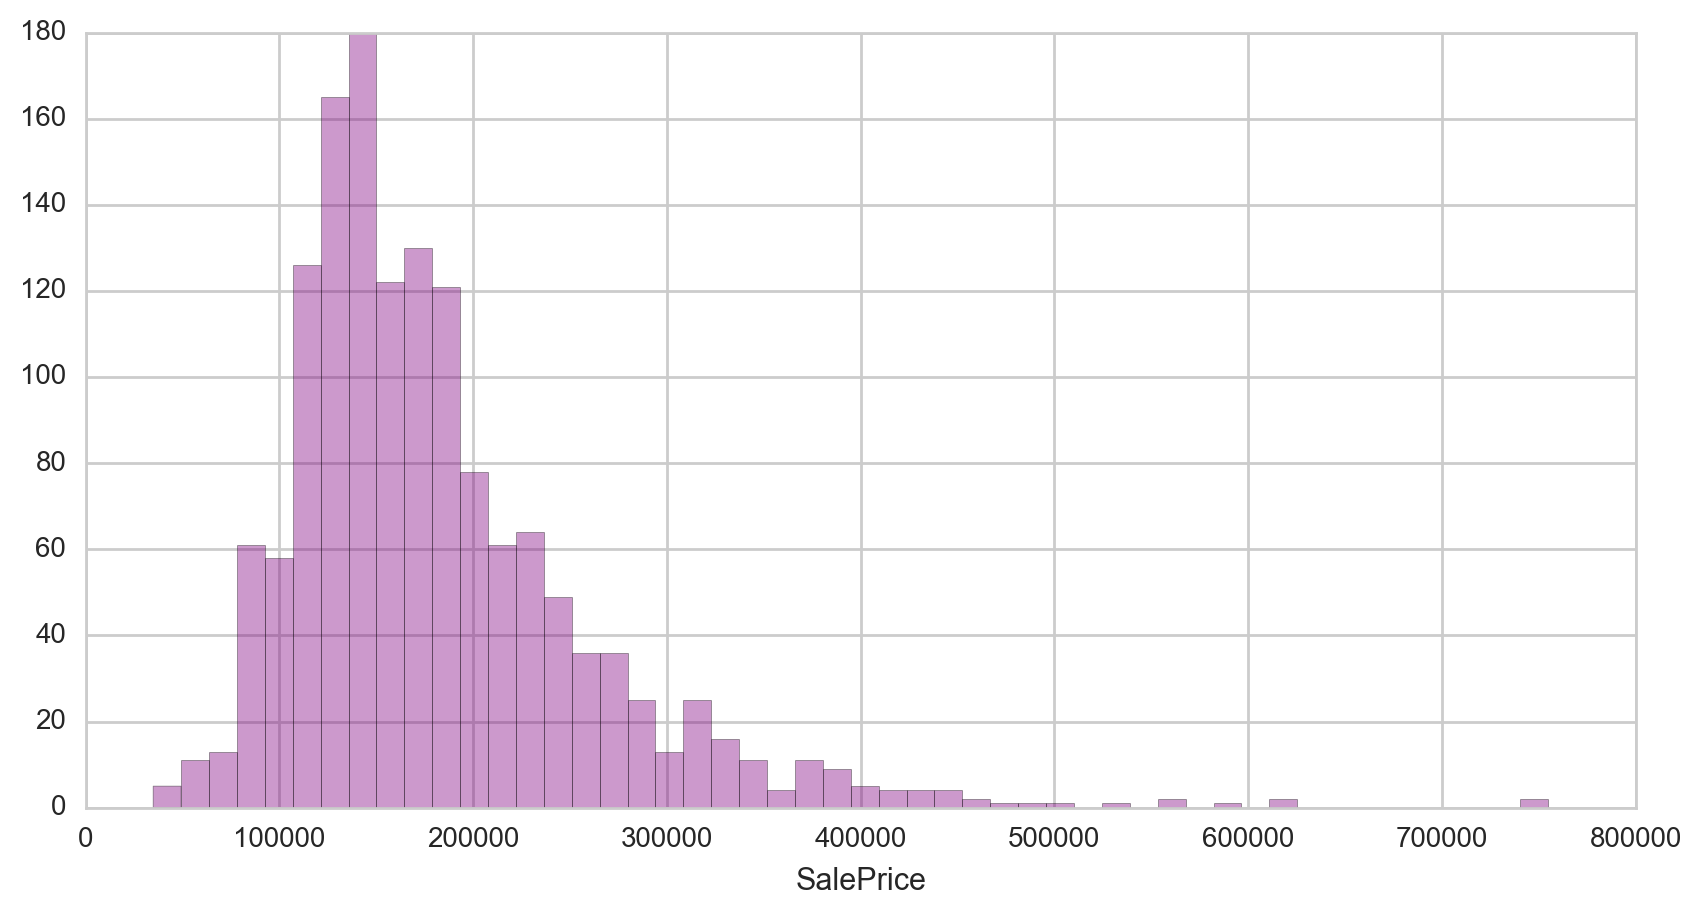

In [21]:
sale_price = house['SalePrice']
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

ax = sns.distplot(sale_price, bins=50, kde=False, color='purple')
plt.show()


In [30]:
house.columns #so I can cut and paste variables instead of having to type the whole thing

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [17]:
sale_price_df = pd.DataFrame(sale_price) #Right skewed, meaning presence of high outliers.
sale_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

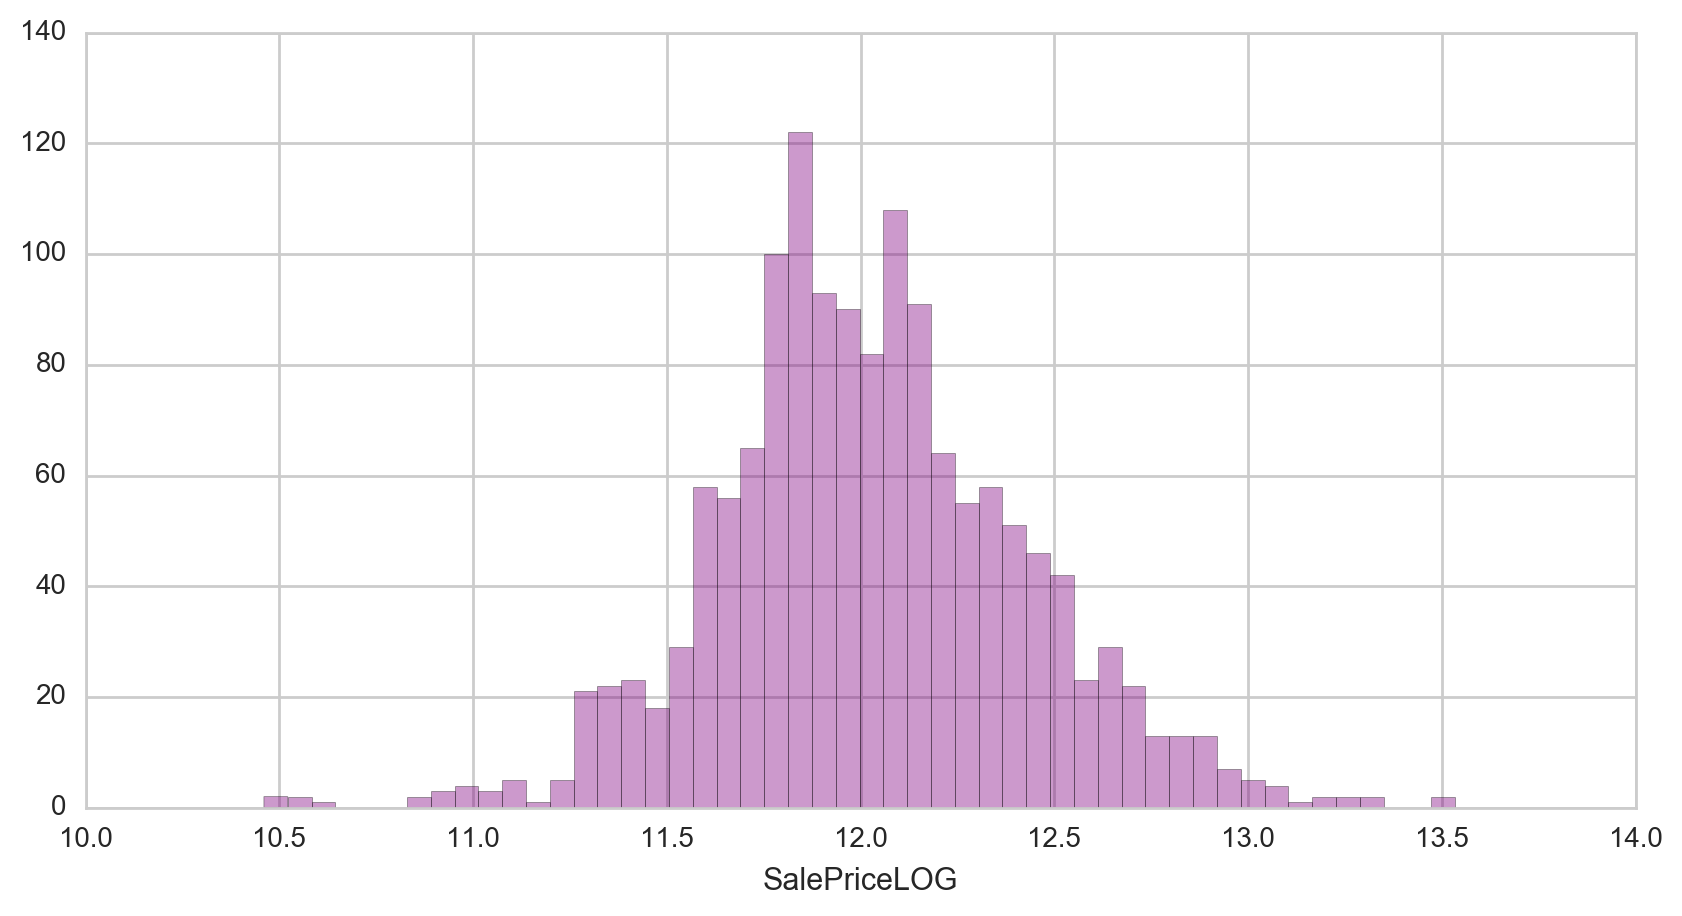

In [34]:
#I chose to transform the distribution using Log because is more effective the more extreme the outlier is
house['SalePriceLOG'] = house['SalePrice'].map(lambda x: np.log(x))

log_sale_price = house['SalePriceLOG'] #First create log(salesprice) variable to make it easier to call

fig = plt.figure(figsize=(10,5)) #plotting graph
ax = fig.gca()

ax = sns.distplot(log_sale_price, bins=50, kde=False, color="Purple")
plt.show() #Log normalizes distribution and eliminates outliers and skewness, but reducing kurtosis

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


In [35]:
house['Age'] = house['YrSold'] - house['YearBuilt'] #
df_corr = pd.DataFrame()
df_corr['Age'] = house['Age']
df_corr['SalePrice'] = house['SalePrice']
df_corr['SalePriceLOG'] = house['SalePriceLOG']
other_corr = df_corr.corr(method='pearson')
print other_corr #log(salesprice) shows a slightly stronger negative correlation with age

                  Age  SalePrice  SalePriceLOG
Age           1.00000  -0.523350     -0.587290
SalePrice    -0.52335   1.000000      0.948374
SalePriceLOG -0.58729   0.948374      1.000000


### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

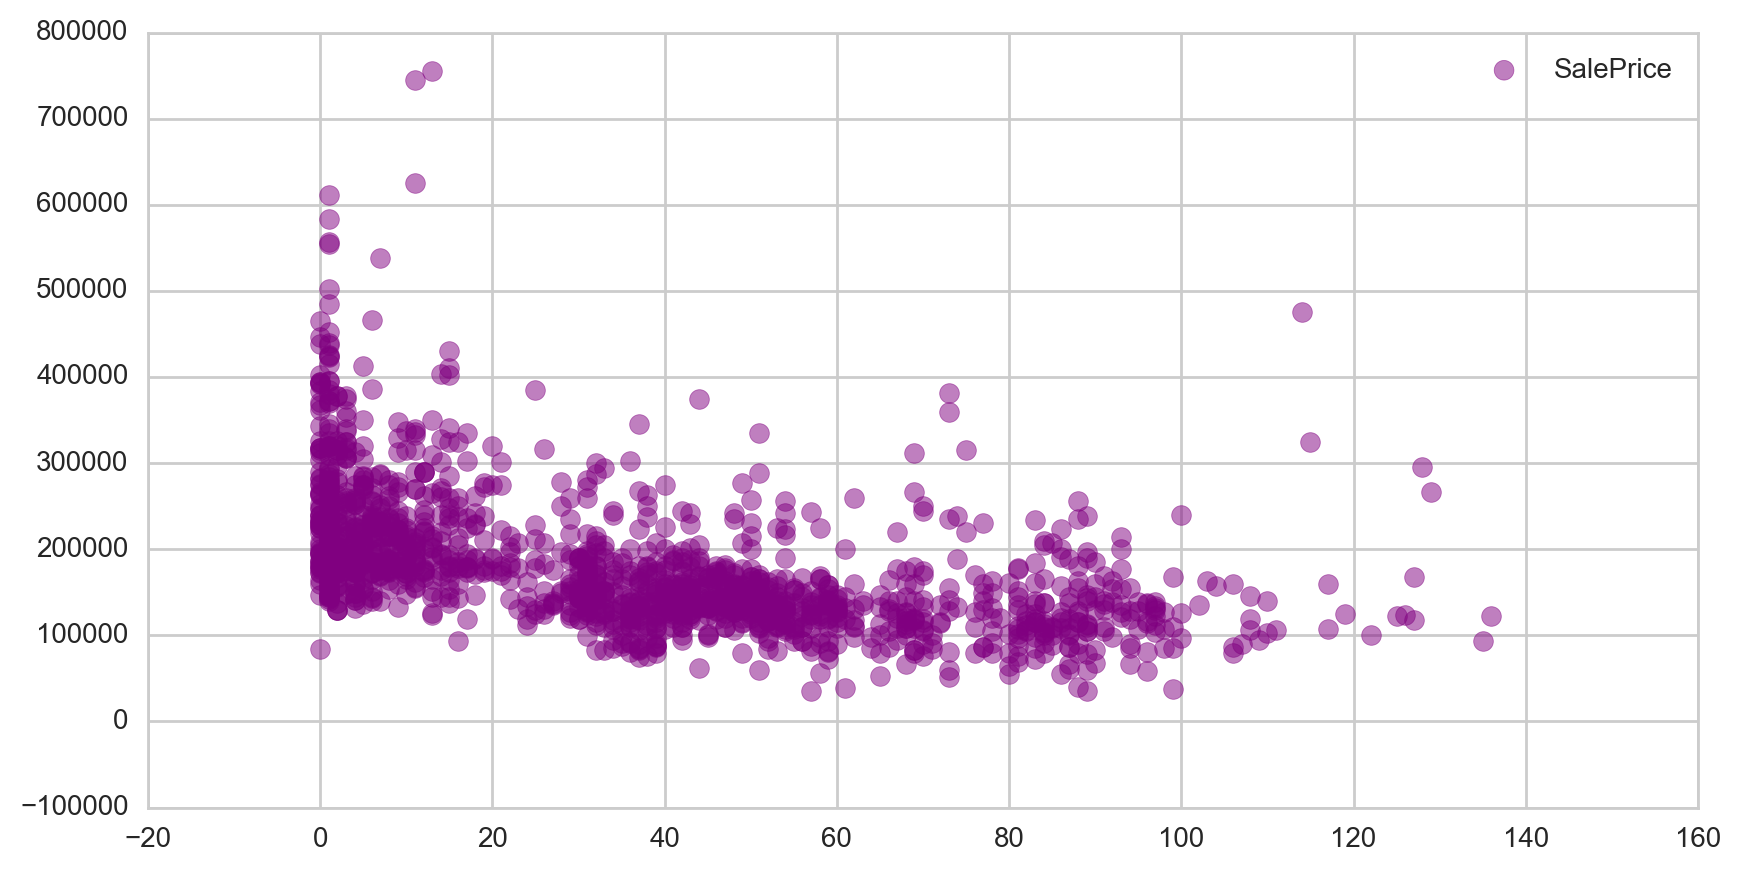

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(house['Age'],house['SalePrice'], s=50, alpha=0.5, color="purple")

plt.legend()
plt.show()

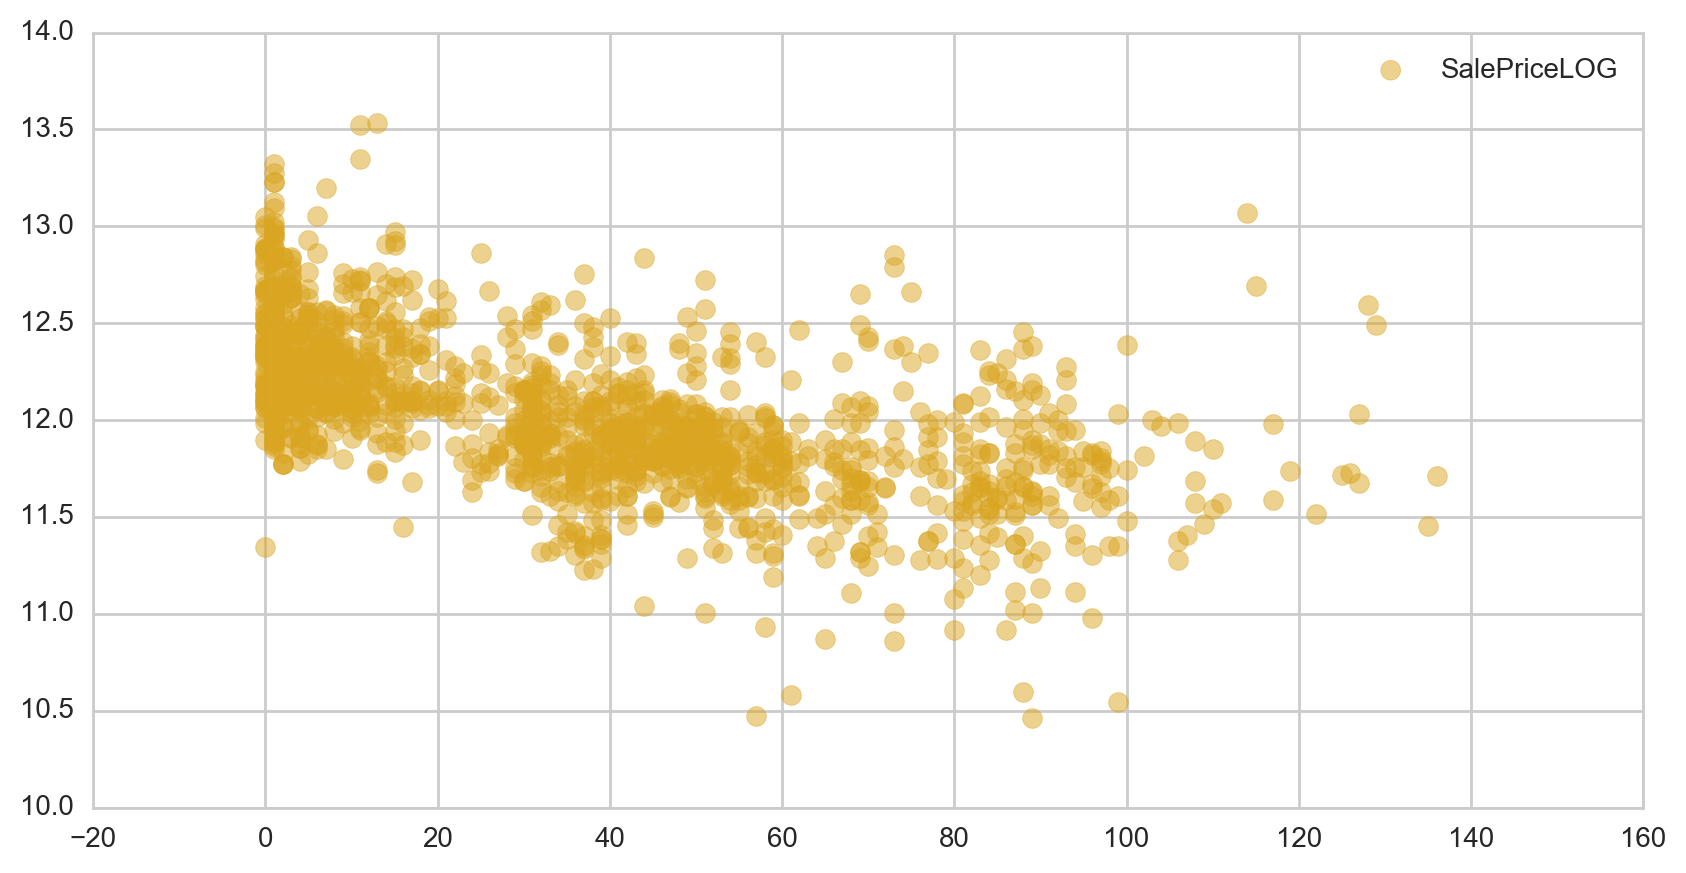

In [42]:
#Log(salesprice) is more dispersed than the original
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(house['Age'],house['SalePriceLOG'], s=50, alpha=0.5, color= "goldenrod")


plt.legend()
plt.show()

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

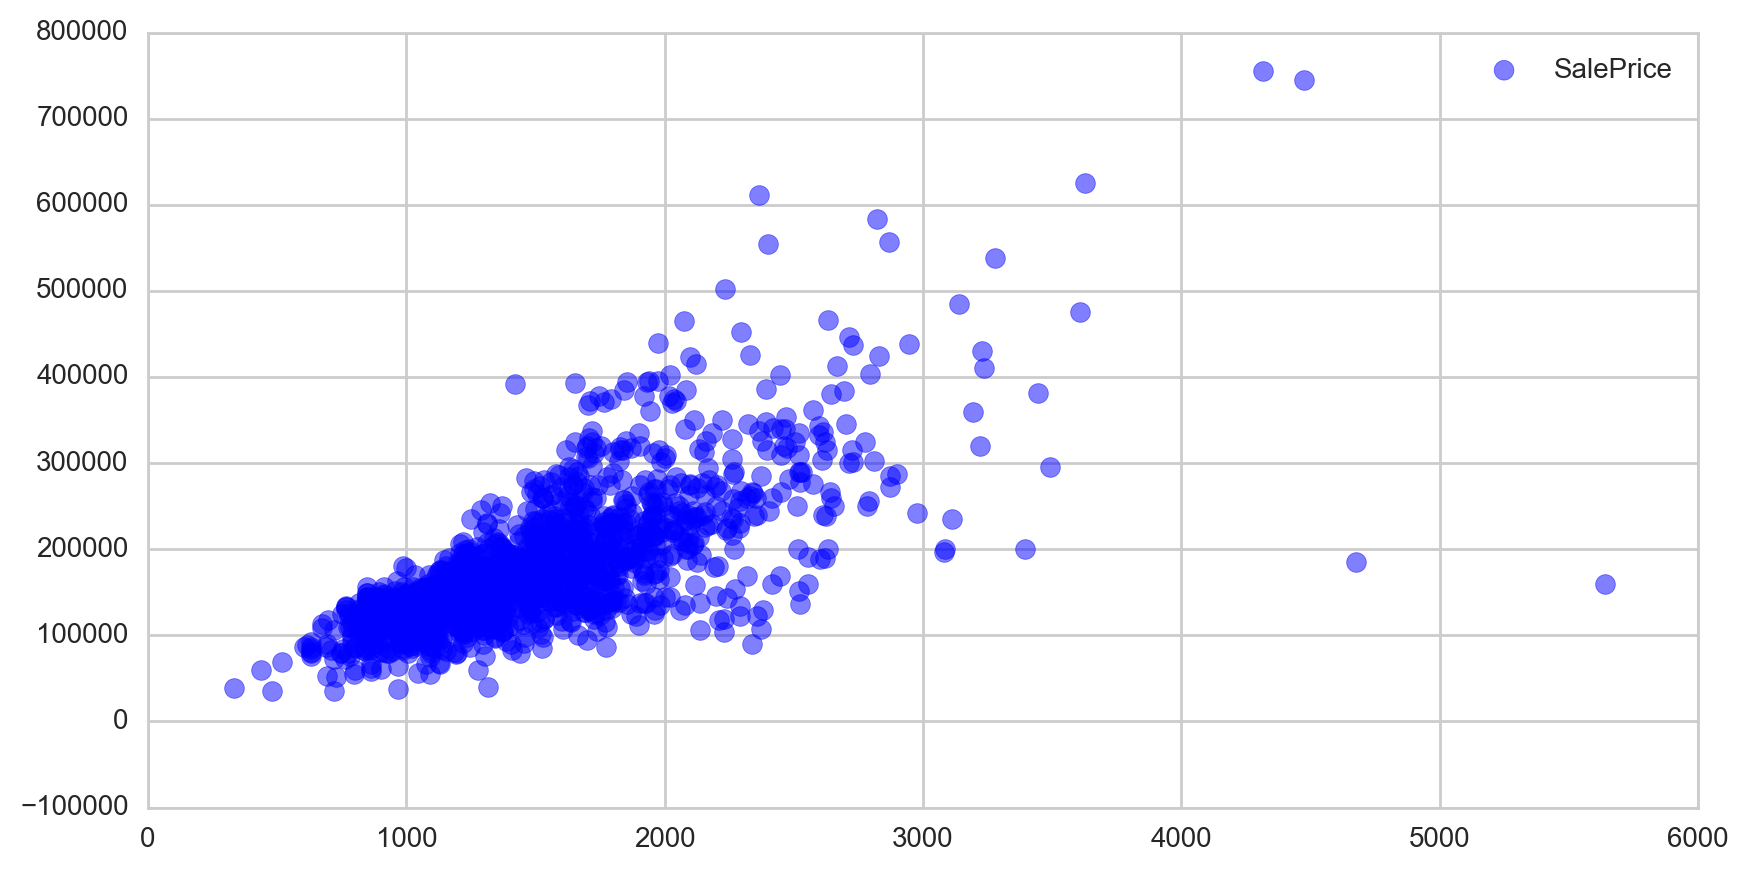

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(house['GrLivArea'],house['SalePrice'], s=50, alpha=0.5, color= "blue") 
#it looks like a decent amount of correlation among the variables. But definitely not that close to 1.

plt.legend()
plt.show()

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

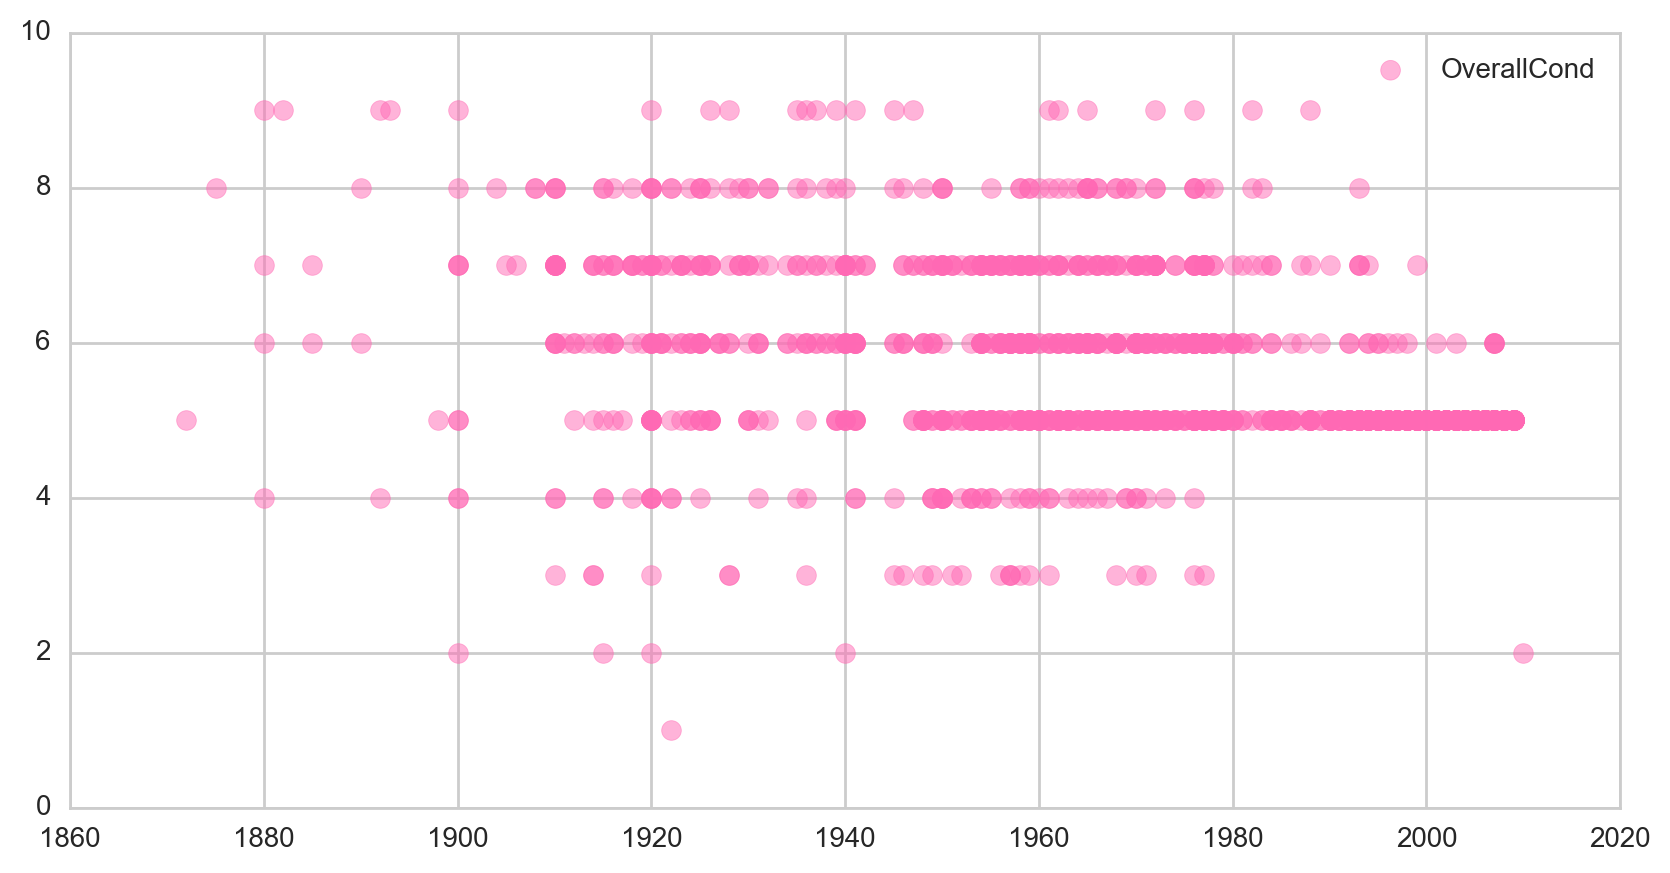

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#I was curious about the overall condition of the houses and see if there was a relationship with the time
#it was built. There is no visible relationship between overall condition and year built

ax.scatter(house['YearBuilt'],house['OverallCond'], s=50, alpha=0.5, color= "hotpink")#these graphs get boring after
                                                    #a while and I feel the need to entertain myself with some color

plt.legend()
plt.show()


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [60]:
house['MSZoning'] = house['MSZoning'].astype(str)
residential = house[house.MSZoning != 'C (all)']
residential.MSZoning.value_counts()

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [62]:
residential.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [61]:
residential.PoolQC.fillna(value= 'None', inplace=True)
residential.MiscFeature.fillna(value = 'None', inplace=True)
residential.Alley.fillna(value = 'None', inplace=True)
residential.Fence.fillna(value = 'None', inplace=True)
residential.FireplaceQu.fillna(value = 'None', inplace=True)
residential.GarageQual.fillna(value = 'None', inplace=True)
residential.GarageCond.fillna(value = 'None', inplace=True)
residential.GarageType.fillna(value = 'None', inplace=True)
residential.GarageFinish.fillna(value = 'None', inplace=True)
residential.BsmtFinType2.fillna(value = 'None', inplace=True)
residential.BsmtFinType1.fillna(value = 'None', inplace=True)
residential.BsmtExposure.fillna(value = 'None', inplace=True)
residential.BsmtCond.fillna(value = 'None', inplace=True)
residential.BsmtQual.fillna(value = 'None', inplace=True)
residential.LotFrontage.fillna(value = 0.0, inplace=True)
residential.MasVnrArea.fillna(value = 103, inplace=True)
residential.MasVnrType.fillna(value = 'None', inplace=True)
residential.Electrical.fillna(value = 'None', inplace=True)
residential.GarageYrBlt.fillna(value= house_residential['YearBuilt'], inplace=True)

null = residential.isnull().sum()
null_sorted = null.sort_values(ascending=False, inplace=False)
print null_sorted

/Users/reemtahir/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Age              0
BsmtQual         0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtCond         0
SalePriceLOG     0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
                ..
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
SalePriceSQR     0
GarageCond       0
GarageArea       0
1stFlrSF         0
GarageCars       0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

Although some variables are maybe not as necessary I don't see any strong reason to remove any quite yet. Below there is some data cleaning that takes place. However at this stage I would like to see how the model responds as is.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

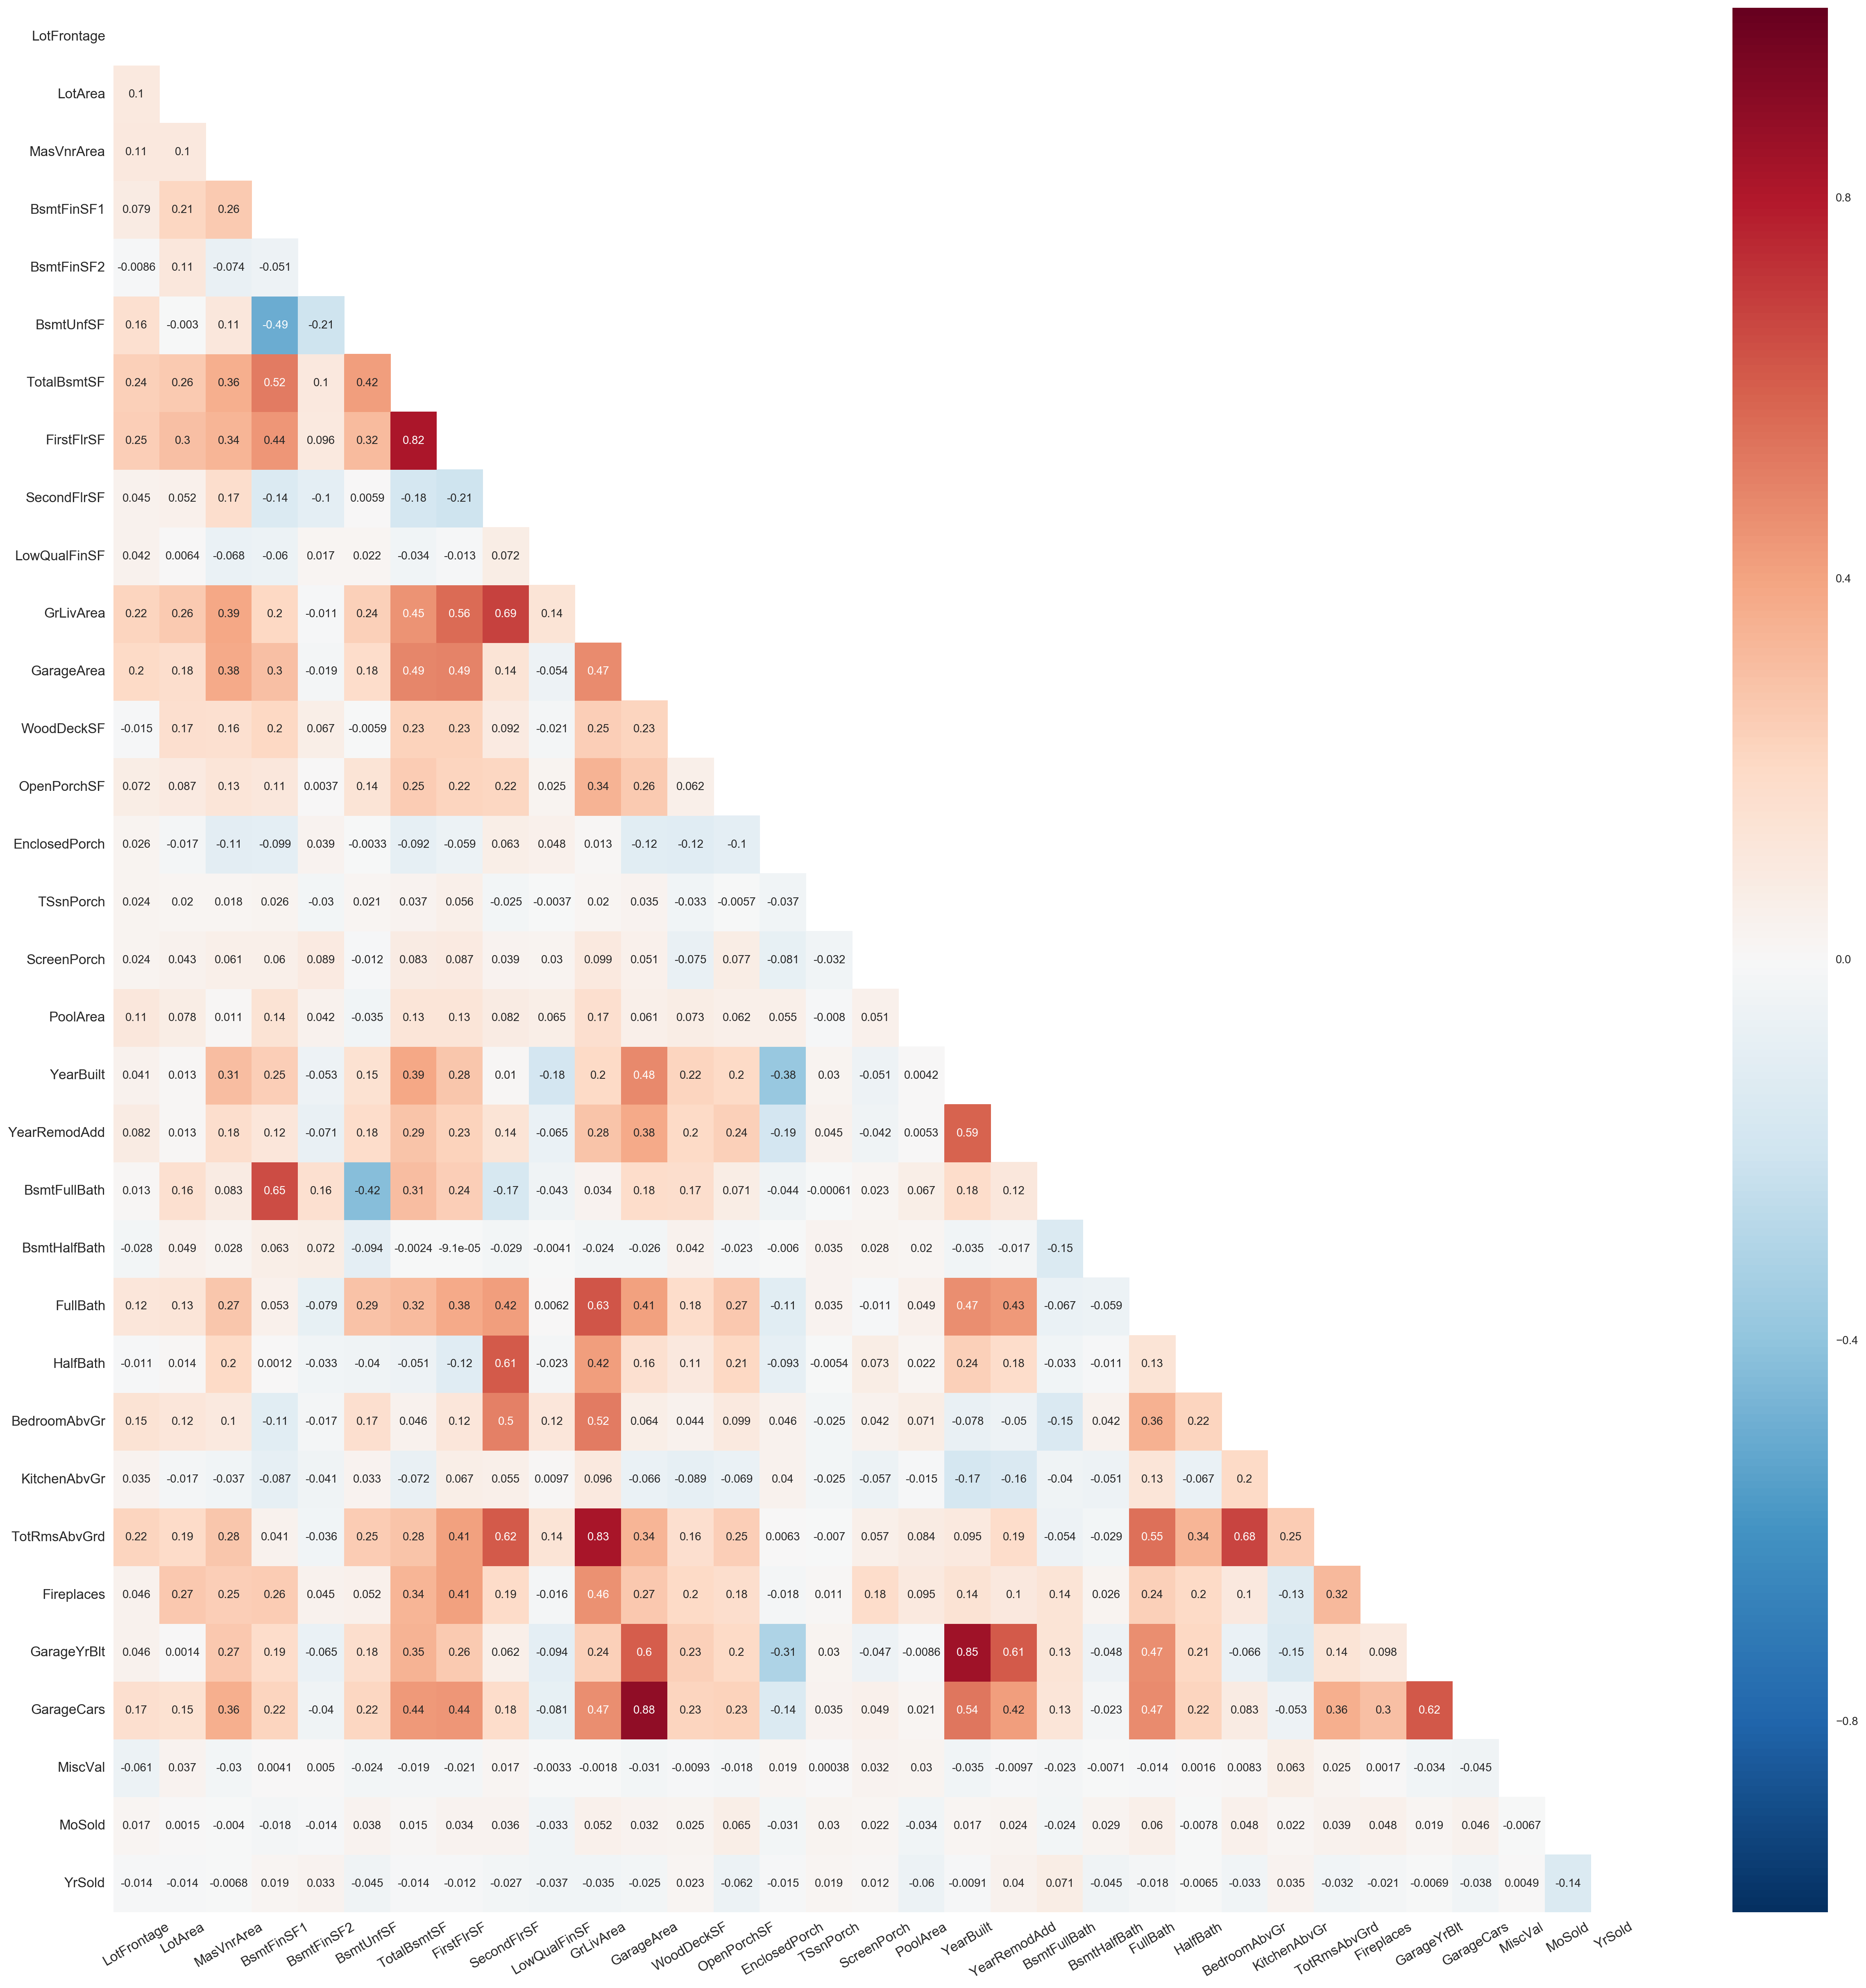

In [163]:

residential_continous = residential[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
                                           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF',
                                           'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                                           'EnclosedPorch', 'TSsnPorch', 'ScreenPorch', 'PoolArea', 'YearBuilt',
                                          'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                                          'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MiscVal',
                                           'MoSold', 'YrSold'
                                          ]]


def corr_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(30,30))

    
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

    
    plt.show()

corr_heat_map(residential_continous)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

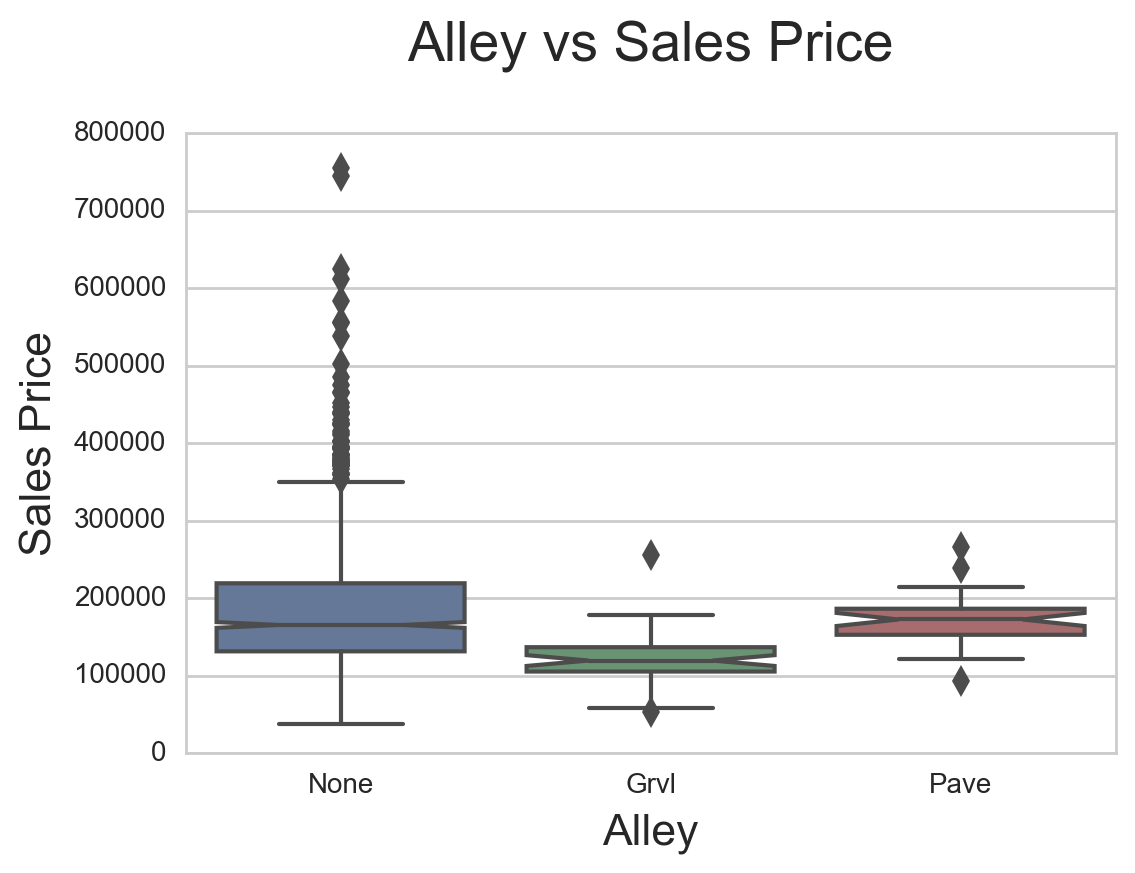

In [80]:
fig = plt.figure(figsize=(6,4)) #Nothing seems surprising here. Houses away from alleys are more expensive
                                #in general. Alleys are creepy anyway
ax = fig.gca()
  

ax = sns.boxplot(x=residential.Alley, y=residential.SalePrice, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_xlabel('Alley', fontsize=16)
ax.set_ylabel('Sales Price', fontsize=16)
ax.set_title('Alley vs Sales Price\n', fontsize=20)

plt.show()

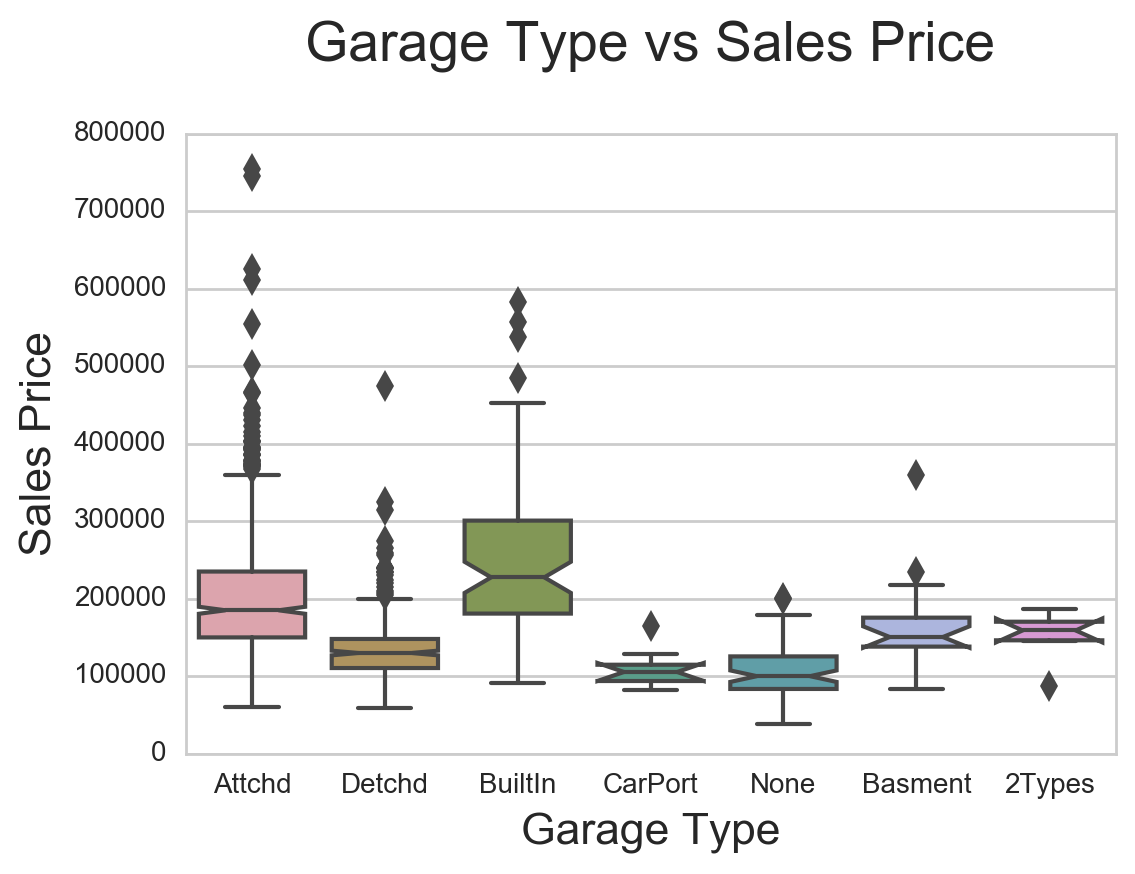

In [86]:
fig = plt.figure(figsize=(6,4)) #Attached garages and built-ins are more expensive, not surprising
ax = fig.gca()
  

ax = sns.boxplot(x=residential.GarageType, y=residential.SalePrice, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_xlabel('Garage Type', fontsize=16)
ax.set_ylabel('Sales Price', fontsize=16)
ax.set_title('Garage Type vs Sales Price\n', fontsize=20)

plt.show()

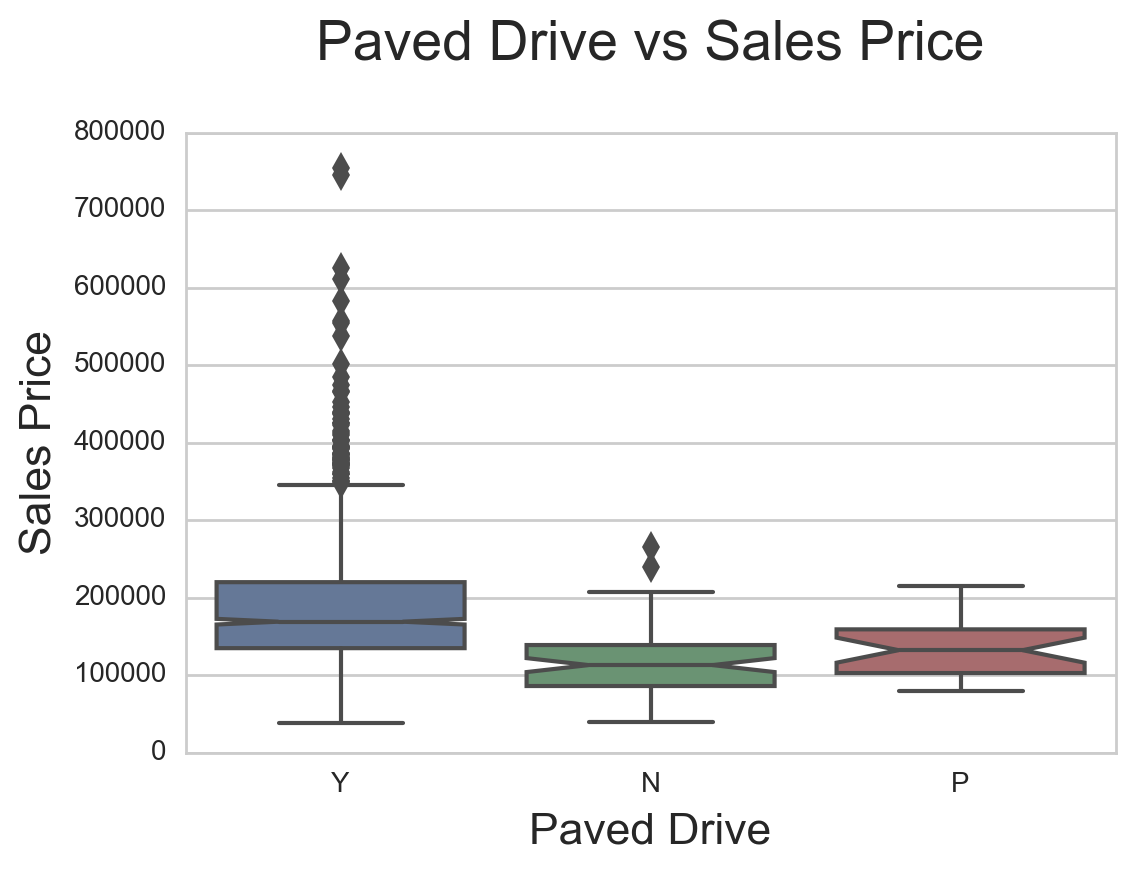

In [85]:
fig = plt.figure(figsize=(6,4)) #Paved driveways are more expensive, not surprising
ax = fig.gca()
  

ax = sns.boxplot(x=residential.PavedDrive, y=residential.SalePrice, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_xlabel('Paved Drive', fontsize=16)
ax.set_ylabel('Sales Price', fontsize=16)
ax.set_title('Paved Drive vs Sales Price\n', fontsize=20)

plt.show()

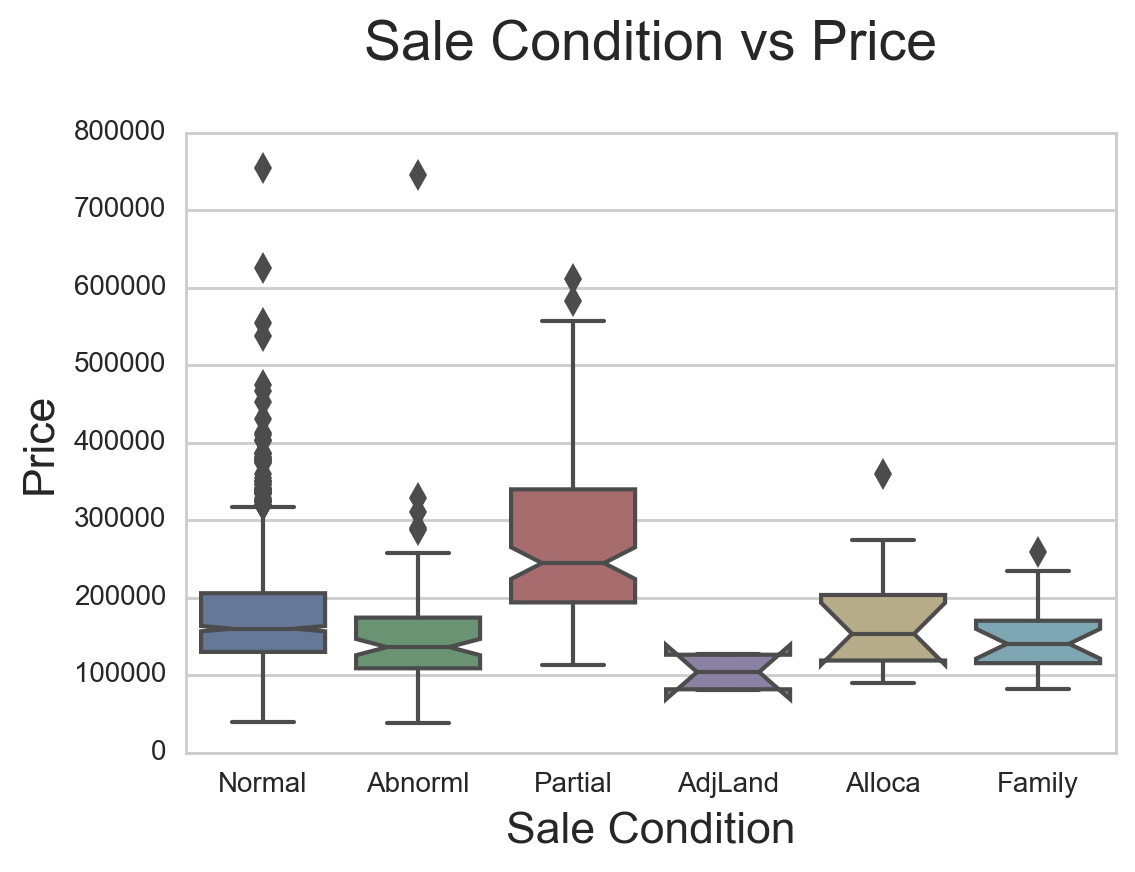

In [84]:
fig = plt.figure(figsize=(6,4)) #This also seems logical
                                
ax = fig.gca()
  

ax = sns.boxplot(x=residential.SaleCondition, y=residential.SalePrice, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_xlabel('Sale Condition', fontsize=16)
ax.set_ylabel('Price', fontsize=16)
ax.set_title('Sale Condition vs Price\n', fontsize=20)

plt.show()

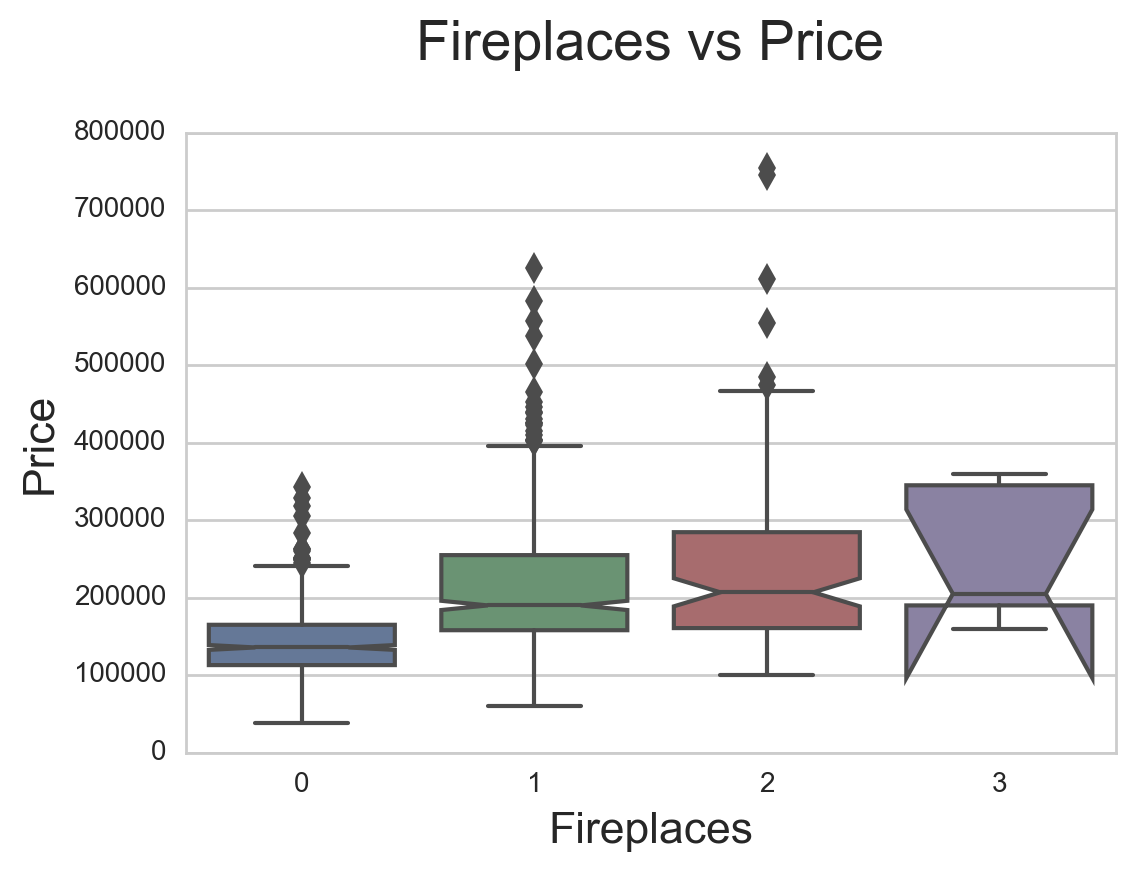

In [83]:
fig = plt.figure(figsize=(6,4)) #Houses with more fireplaces are more luxurious and cost more
                                # the diference between 2 and 3 fireplaces was interesting
ax = fig.gca()
  

ax = sns.boxplot(x=residential.Fireplaces, y=residential.SalePrice, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_xlabel('Fireplaces', fontsize=16)
ax.set_ylabel('Price', fontsize=16)
ax.set_title('Fireplaces vs Price\n', fontsize=20)

plt.show()

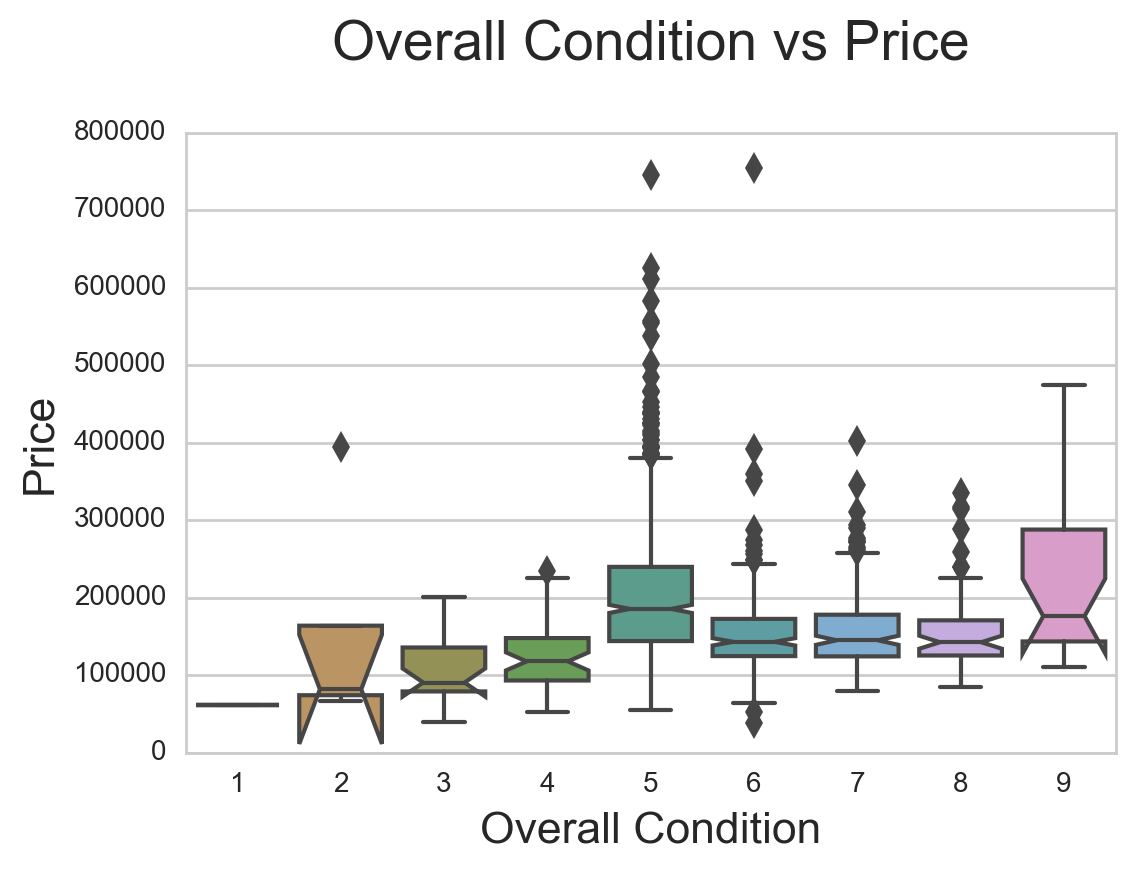

In [74]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
  

ax = sns.boxplot(x=residential.OverallCond, y=residential.SalePrice, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_xlabel('Overall Condition', fontsize=16)
ax.set_ylabel('Price', fontsize=16)
ax.set_title('Overall Condition vs Price\n', fontsize=20)

plt.show()

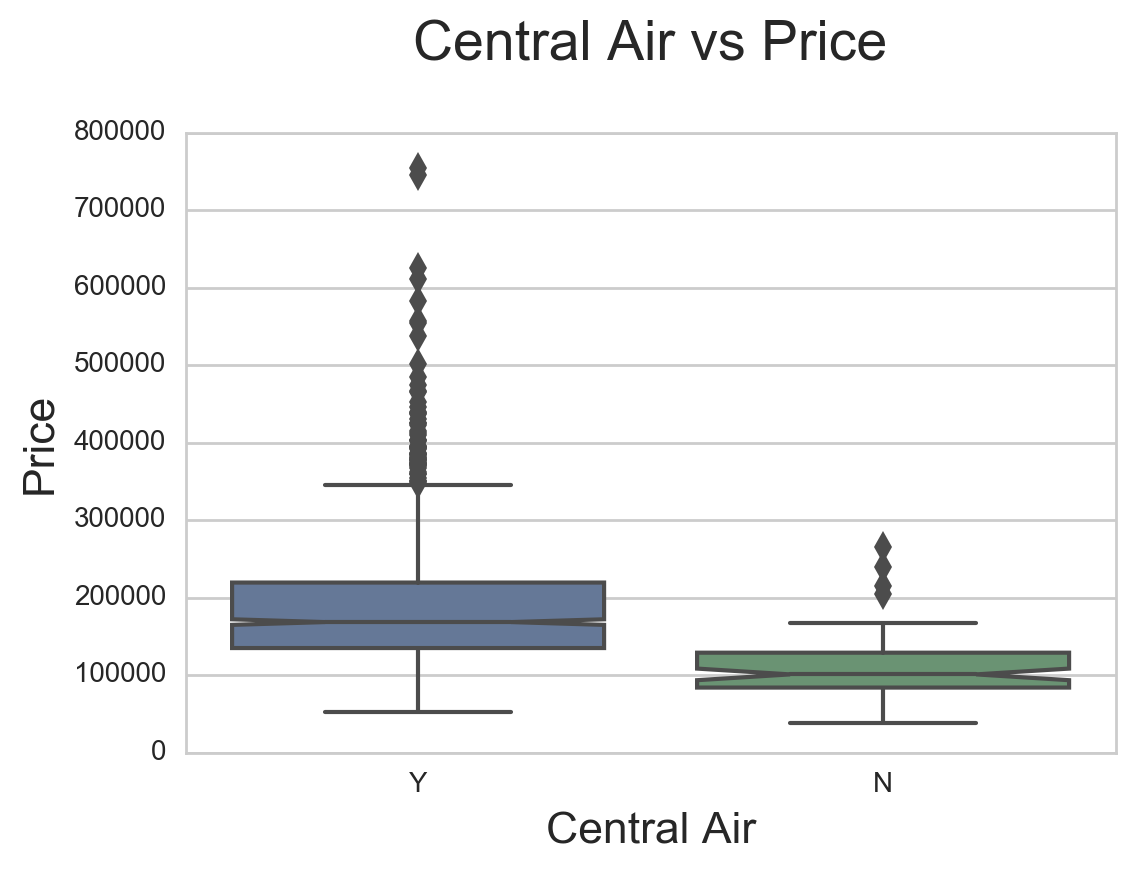

In [90]:
fig = plt.figure(figsize=(6,4)) #Central air houses are more expensive, which makes sense
ax = fig.gca()
  

ax = sns.boxplot(x=residential.CentralAir, y=residential.SalePrice, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_xlabel('Central Air', fontsize=16)
ax.set_ylabel('Price', fontsize=16)
ax.set_title('Central Air vs Price\n', fontsize=20)

plt.show()

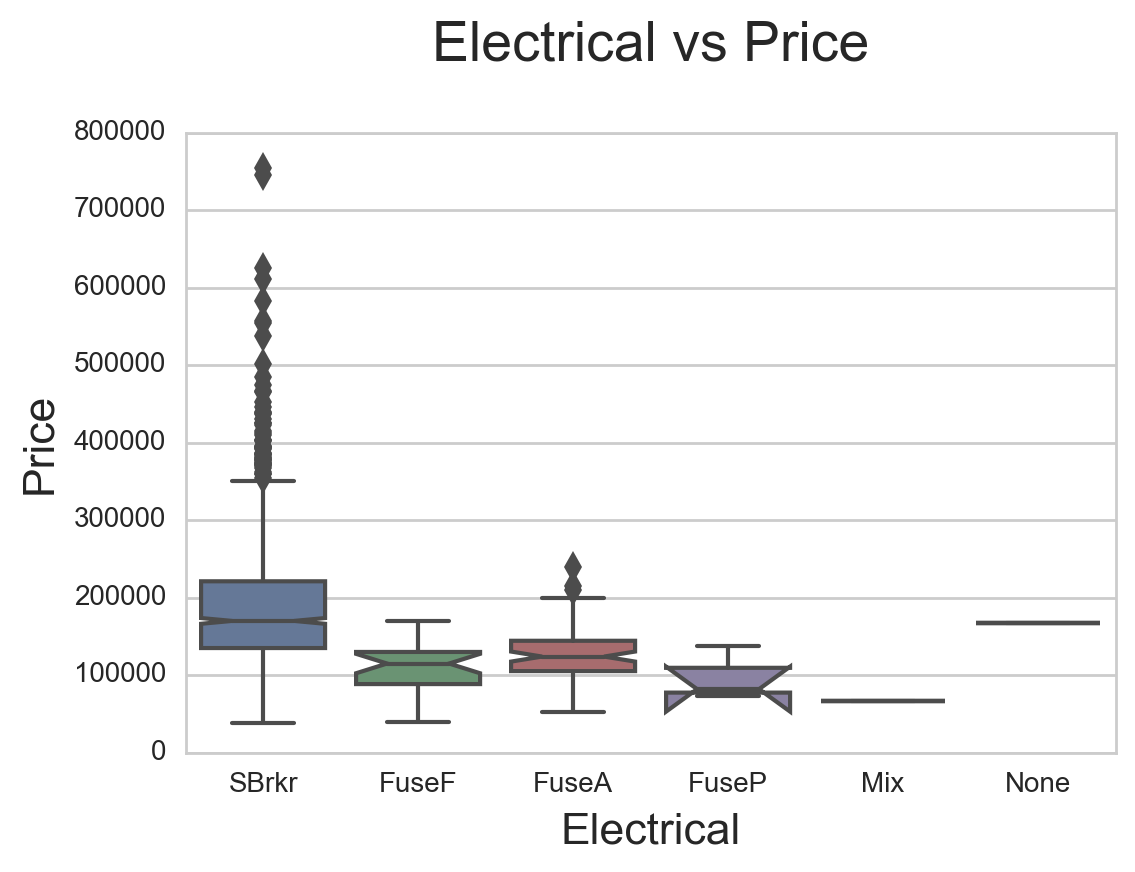

In [92]:
fig = plt.figure(figsize=(6,4)) #I don't know much about Electrical circuits, except that not having them must
                                #bring the price down by a lot, so no surprises here
ax = fig.gca()
  

ax = sns.boxplot(x=residential.Electrical, y=residential.SalePrice, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_xlabel('Electrical', fontsize=16)
ax.set_ylabel('Price', fontsize=16)
ax.set_title('Electrical vs Price\n', fontsize=20)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


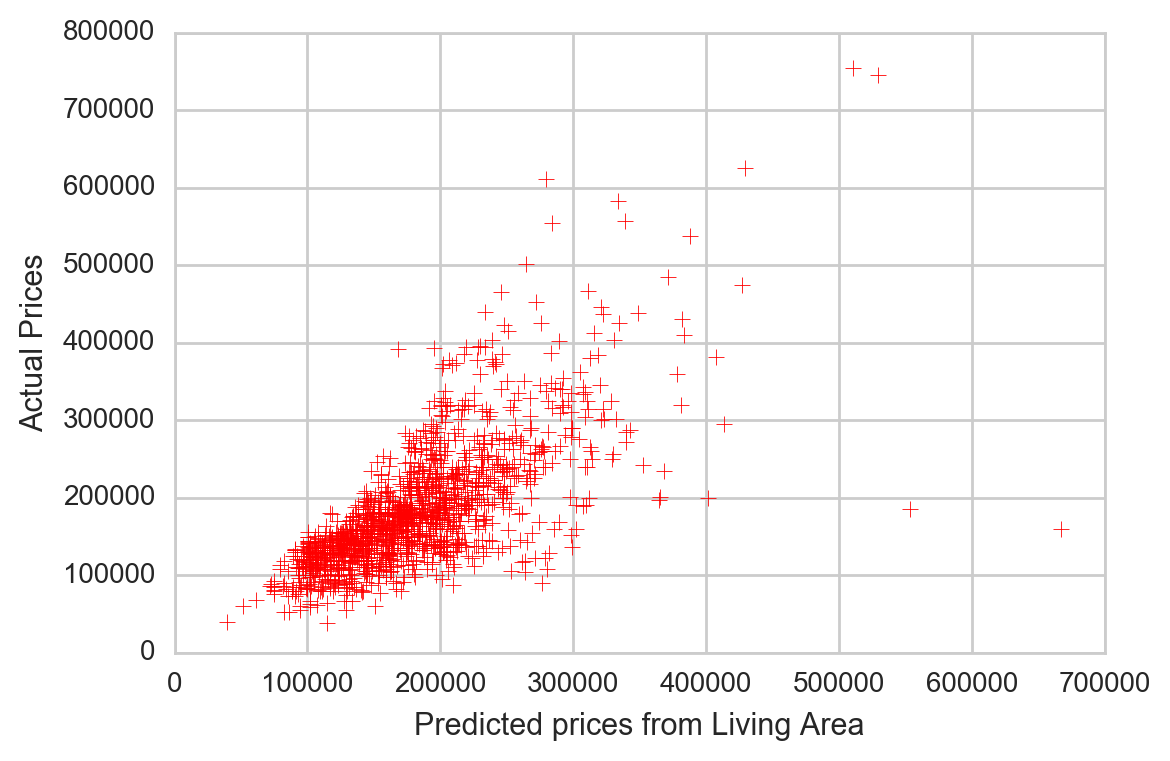

MSE: 3159170039.5


In [102]:

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

X = house_residential["GrLivArea"]
y = house_residential["SalePrice"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted prices from Living Area")
plt.ylabel("Actual Prices")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.656e+04
Date:                Sun, 04 Dec 2016   Prob (F-statistic):               0.00
Time:                        22:26:48   Log-Likelihood:                -17916.
No. Observations:                1450   AIC:                         3.583e+04
Df Residuals:                    1449   BIC:                         3.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
GrLivArea    118.3181      0.919    128.684      0.000       116.514   120.122
==============================================================================
Omnibus:                      244.462   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4581.487
Skew:                          -0.053   Prob(JB):                         0.00
Kurtosis:                      11.707   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

1. The intercept coefficient represents the constant that is used to ensures our residuals have a mean of 0. It is typically used (there are times when you want to force an intercept of 0) to help minimize the least squares.

2) The coefficient on GrLivArea represents the rate of change. For each additional unit in living area the price increases by $118.3 on average. 

3) The R^2 shows that the 92% of the data is explained by the model. This is unfortunately very high and perhaps I should've gotten rid of some variables at the beginning. This R^2 could be due a variety of reasons beyond very linear data (which isn't the case). It could be that many variables are highly correlated to each other, or are related to one another by a certain interval which distorts the data.

4) T, or the t-statistic is 128, which is high. The greater the magnitude of T, the greater the evidence against the null hypothesis that there is no significant difference. This is because it calculates difference represented in units of standard error. The p-value is strongly related to the T. If the P-value is less than α, reject the null hypothesis. In this case we reject the null hypothesis that GrLivArea is statistically significant. All the these metrics point to the fact that somehow the data doesn't match our model and that we must adjust the model.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

In [106]:
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()

X = residential[["YearBuilt", 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 
                       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                       'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 
                       'MoSold', 'LotArea', 'LotFrontage', 'BedroomAbvGr','KitchenAbvGr' ]]
y = residential["SalePrice"]

model        =  lm.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

### 8.2 Calculate the $R^2$ of your model.

In [108]:
print "R^2:"

R^2: 0.773662252342


### 8.3 Plot the residuals against the true values.

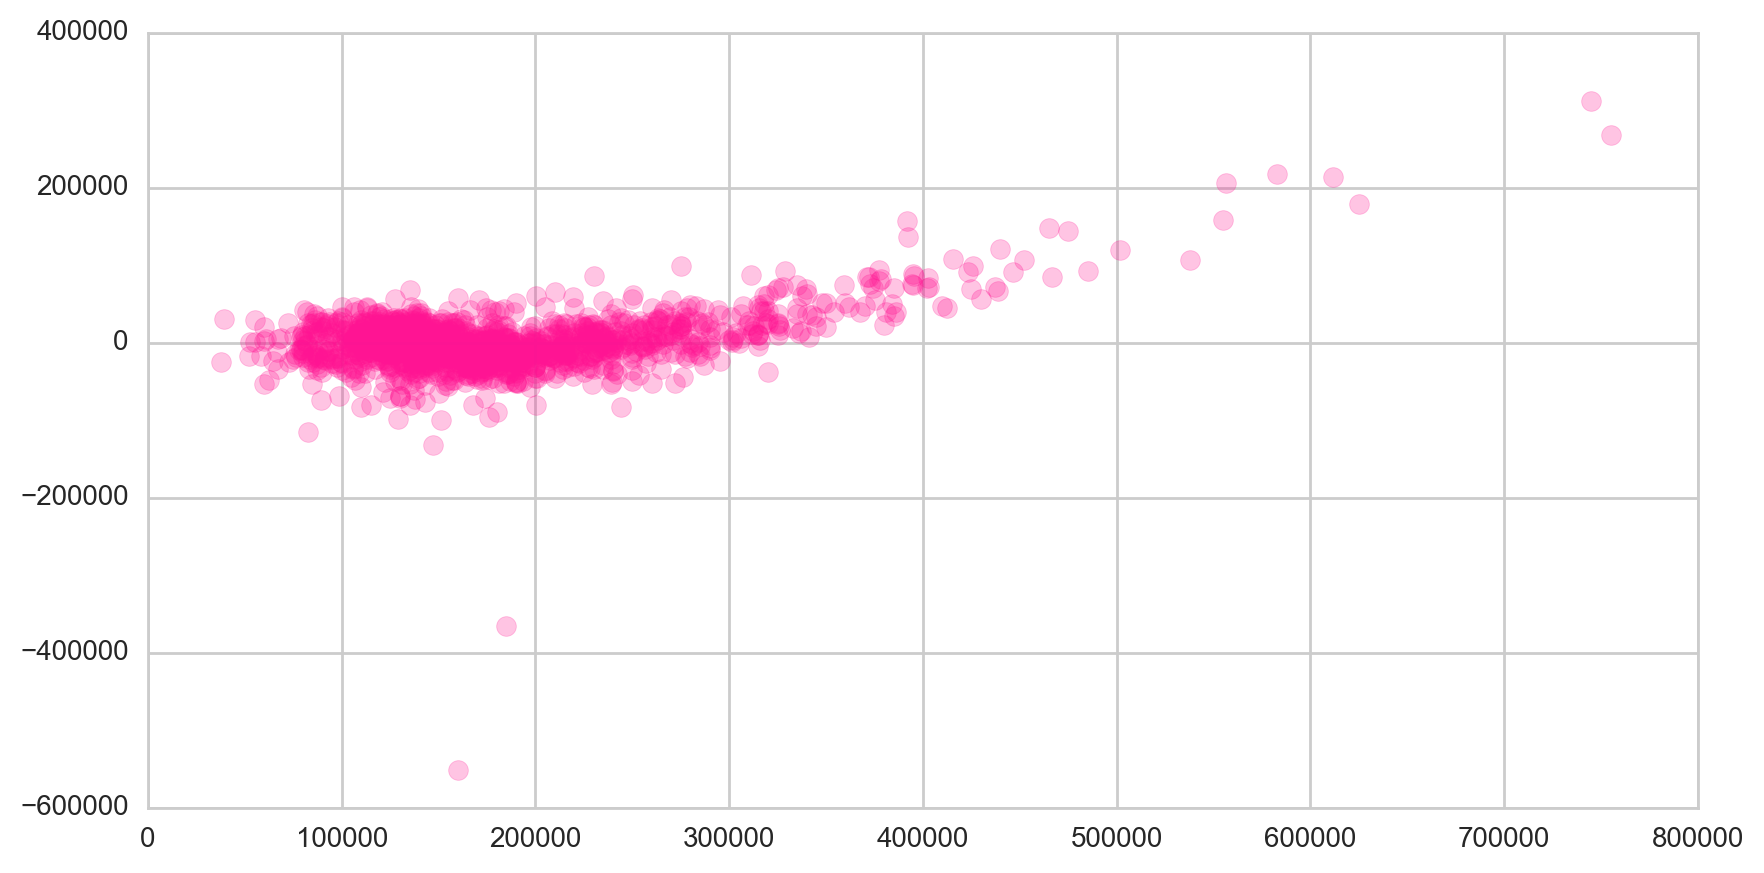

In [112]:
residuals = y - predictions
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(y, residuals, s=50, alpha=0.25, color="deeppink")
plt.show()

### 8.4 Plot a histogram of the residuals.

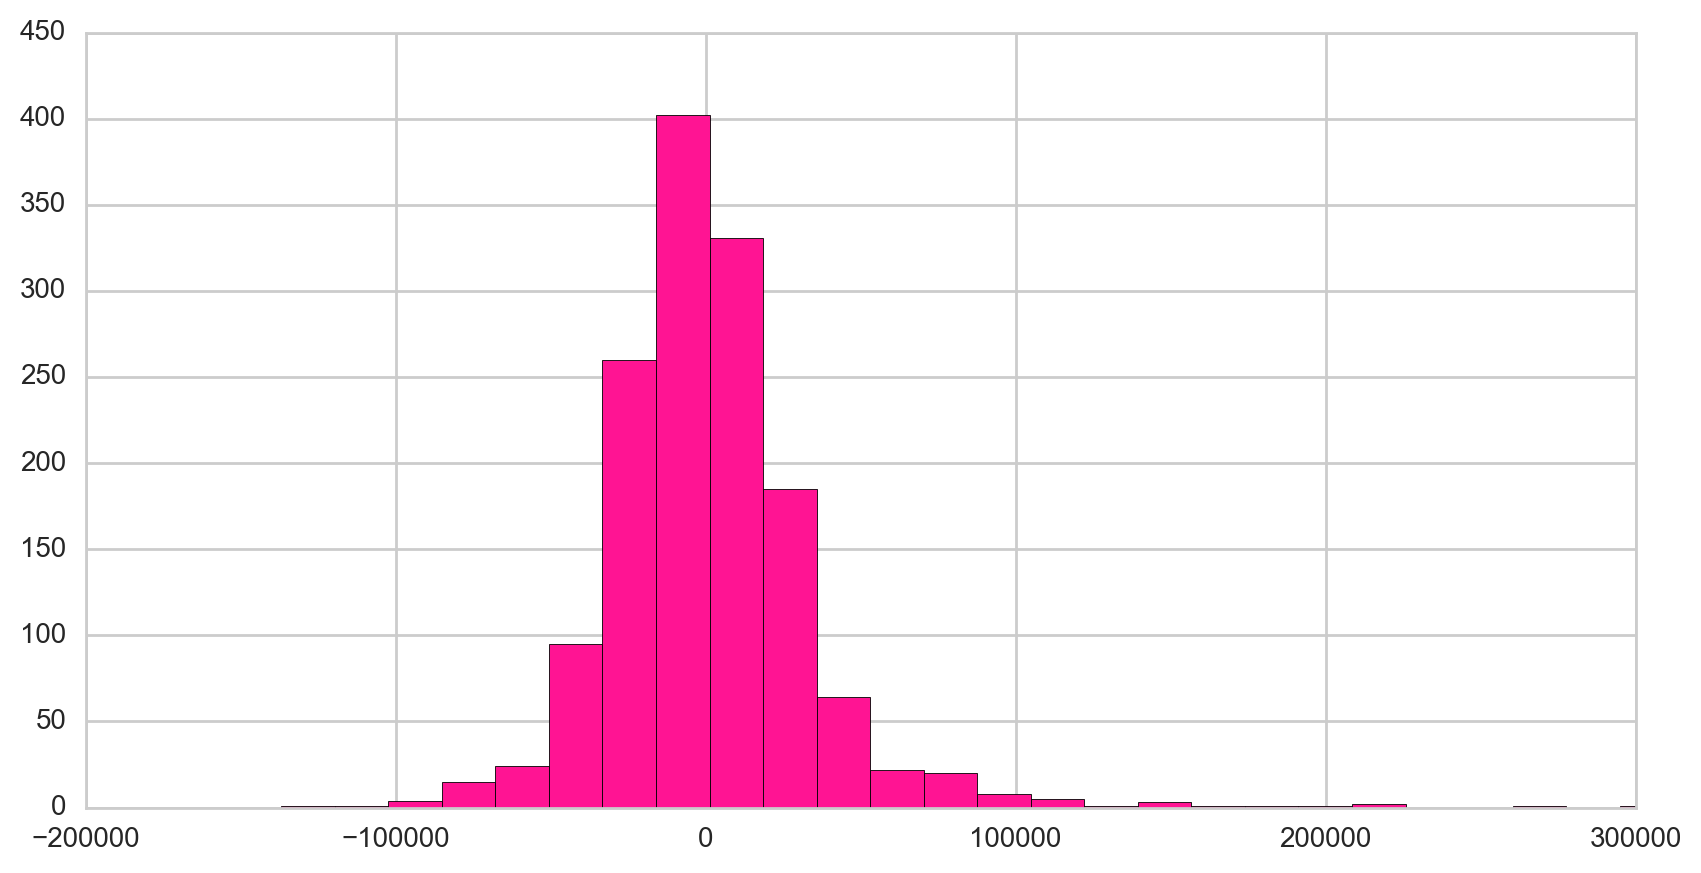

In [113]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(residuals, bins=50, color="deeppink") #omg new favorite color
ax.set_xlim(-200000, 300000)
plt.show()

### 8.5 Make a plot to show the strength of the different coefficients.

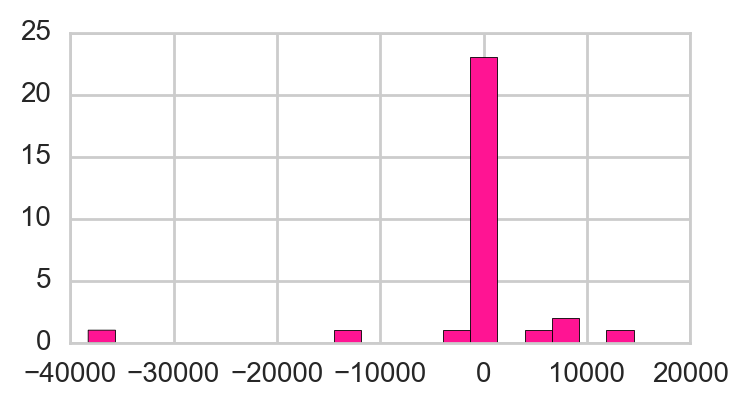

Coefficients range: 52796.3927576


In [118]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.hist(model.coef_, bins=20, color="deeppink")
ax.set_ylim(0, 25)
plt.show()
print 'Coefficients range:', model.coef_.max() - model.coef_.min()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [119]:
residential.rename(columns={'2ndFlrSF': 'SecondFlrSF', '1stFlrSF': 'FirstFlrSF', '3SsnPorch': 'TSsnPorch'}, inplace=True)

/Users/reemtahir/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [123]:
features = residential.columns
predictor = 'SalePrice'

def create_formula(features, predictor):
    
    return predictor + " ~ " + " + ".join(features)

create_formula(features, predictor)

'SalePrice ~ Id + MSSubClass + MSZoning + LotFrontage + LotArea + Street + Alley + LotShape + LandContour + Utilities + LotConfig + LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + MasVnrArea + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinSF1 + BsmtFinType2 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + CentralAir + Electrical + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + FireplaceQu + GarageType + GarageYrBlt + GarageFinish + GarageCars + GarageArea + GarageQual + GarageCond + PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + TSsnPorch + ScreenPorch + PoolArea + PoolQC + Fence + MiscFeature + MiscVal + MoSold + YrSold + Sale

In [125]:

import patsy
formula  =  'SalePrice ~ MSSubClass + MSZoning + LotFrontage + LotArea + Street + Alley + LotShape + LandContour + Utilities + LotConfig + LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + MasVnrArea + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinSF1 + BsmtFinType2 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + CentralAir + Electrical + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + FireplaceQu + GarageType + GarageYrBlt + GarageFinish + GarageCars + GarageArea + GarageQual + GarageCond + PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + TSsnPorch + ScreenPorch + PoolArea + PoolQC + Fence + MiscFeature + MiscVal + MoSold + YrSold + SaleType + SaleCondition + Age + SecondFlrSF + FirstFlrSF + TSsnPorch -1'
y, X     =  patsy.dmatrices(formula, data=residential, return_type="dataframe")

### 9.2 Fit a linear regression using all of the predictors and score it.

In [126]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X, y)
score = model.score(X, y)
print 'R^2 score:',score

R^2 score: 0.932916263937


### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

The R^2 seems very high and could be explained by both multicollinearity and autocorrelation. Multi-colinearity is when two or more variables in the data set are highly correlated. This leads to a false expectation that the model is more linear than it actually is. Autocorrelation is the correlation of a signal with itself at different points in time. Both seem to be present in this data set and would artificially inflate the R^2 score, implying that the 93% of the model is explained, when it is in fact not.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

In [127]:
from sklearn.cross_validation import cross_val_score, cross_val_predict


scores = cross_val_score(model, X, y, cv=20)
print scores
print "Cross-validated scores mean:", sum(scores)/len(scores)

/Users/reemtahir/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[  9.05412822e-01  -2.29173280e+07  -7.74146181e+07  -8.35565426e+07
  -1.00205759e+08   9.09041021e-01   9.13456098e-01  -2.35401197e+04
  -2.19230689e+08  -3.29009800e+07   8.88499598e-01  -2.54093344e+02
  -1.88132176e+12  -9.37604413e+07   8.73993967e-01  -8.27803868e-01
   8.13123928e-01  -1.09692344e+08  -4.66207428e+06  -1.91014528e+00]
Cross-validated scores mean: -94103306087.0


In [128]:
from sklearn import metrics
predictions = cross_val_predict(model, X, y, cv=20)


accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

Cross-Predicted Accuracy: -83301643008.5


### 10.2 What does the cross-validated average $R^2$ tell you?

In [ ]:
from sklearn import metrics
predictions = cross_val_predict(model, X, y, cv=20)


accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


R^2 is negative when the model does not explain the data. The formula is R^2 = 1 - (SSE/SST), which means that if the standard errors are 0 (we did an amazing job of predicting the model), then 100% of the data is explained by our model. If we have an R^2 of 0, it means that the model doesn't explain the data at all. It's interesting to point on that although there is a limit to 'correctness' (1), there is an infinite amount of errors that can occur, therefore the R^2 can be infinitely negative.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [129]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xn, y)

print optimal_lasso.alpha_

/Users/reemtahir/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1096.55265639


....[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.4s finished


### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

In [130]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.91437522  0.89996591  0.90686476  0.77435212  0.87389879  0.77920596
  0.86730617  0.86210266  0.58526096  0.82866879]
0.829200132059


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

LASSO stands for least absolute shrinkage and selection operator. It is useful because it performs both variable selection and regularization, which enhances prediction accuracy. It also makes it easier to interpret the statistical model it produces. LASSO automatically shrinks parameters and aids in variable selection.

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

In [131]:
lasso.fit(Xn, y)

lasso_coeffs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_})
                            

lasso_coeffs.sort_values('coef', inplace=True, ascending=False)

lasso_nonzero = lasso_coeffs[lasso_coeffs['coef'] > 0]

print lasso_nonzero
print lasso_nonzero.count()

             coef                 variable
239  24504.744577                GrLivArea
227  16446.613252              OverallQual
35    8549.506926  Neighborhood[T.NridgHt]
249   6802.940385               GarageCars
34    6251.729069  Neighborhood[T.NoRidge]
229   6043.001197                YearBuilt
41    5273.864160  Neighborhood[T.StoneBr]
216   4960.383480          SaleType[T.New]
134   4872.743866       BsmtExposure[T.Gd]
81    4372.182026      RoofMatl[T.WdShngl]
228   4236.144102              OverallCond
232   4134.083527               BsmtFinSF1
256   3192.157270                 PoolArea
25    3051.185025  Neighborhood[T.Crawfor]
231   2904.860651               MasVnrArea
235   2886.244840              TotalBsmtSF
45    2828.288906       Condition1[T.Norm]
230   2764.329417             YearRemodAdd
226   2624.741305                  LotArea
84    2410.797792   Exterior1st[T.BrkFace]
173   2334.288567        Functional[T.Typ]
247   2244.005656               Fireplaces
240   2227.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

In [134]:
formula  =  'SalePrice ~ LotFrontage + LotArea + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + TSsnPorch + ScreenPorch + PoolArea  -1'
y, X     =  patsy.dmatrices(formula, data=residential, return_type="dataframe")

Xn = ss.fit_transform(X)

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

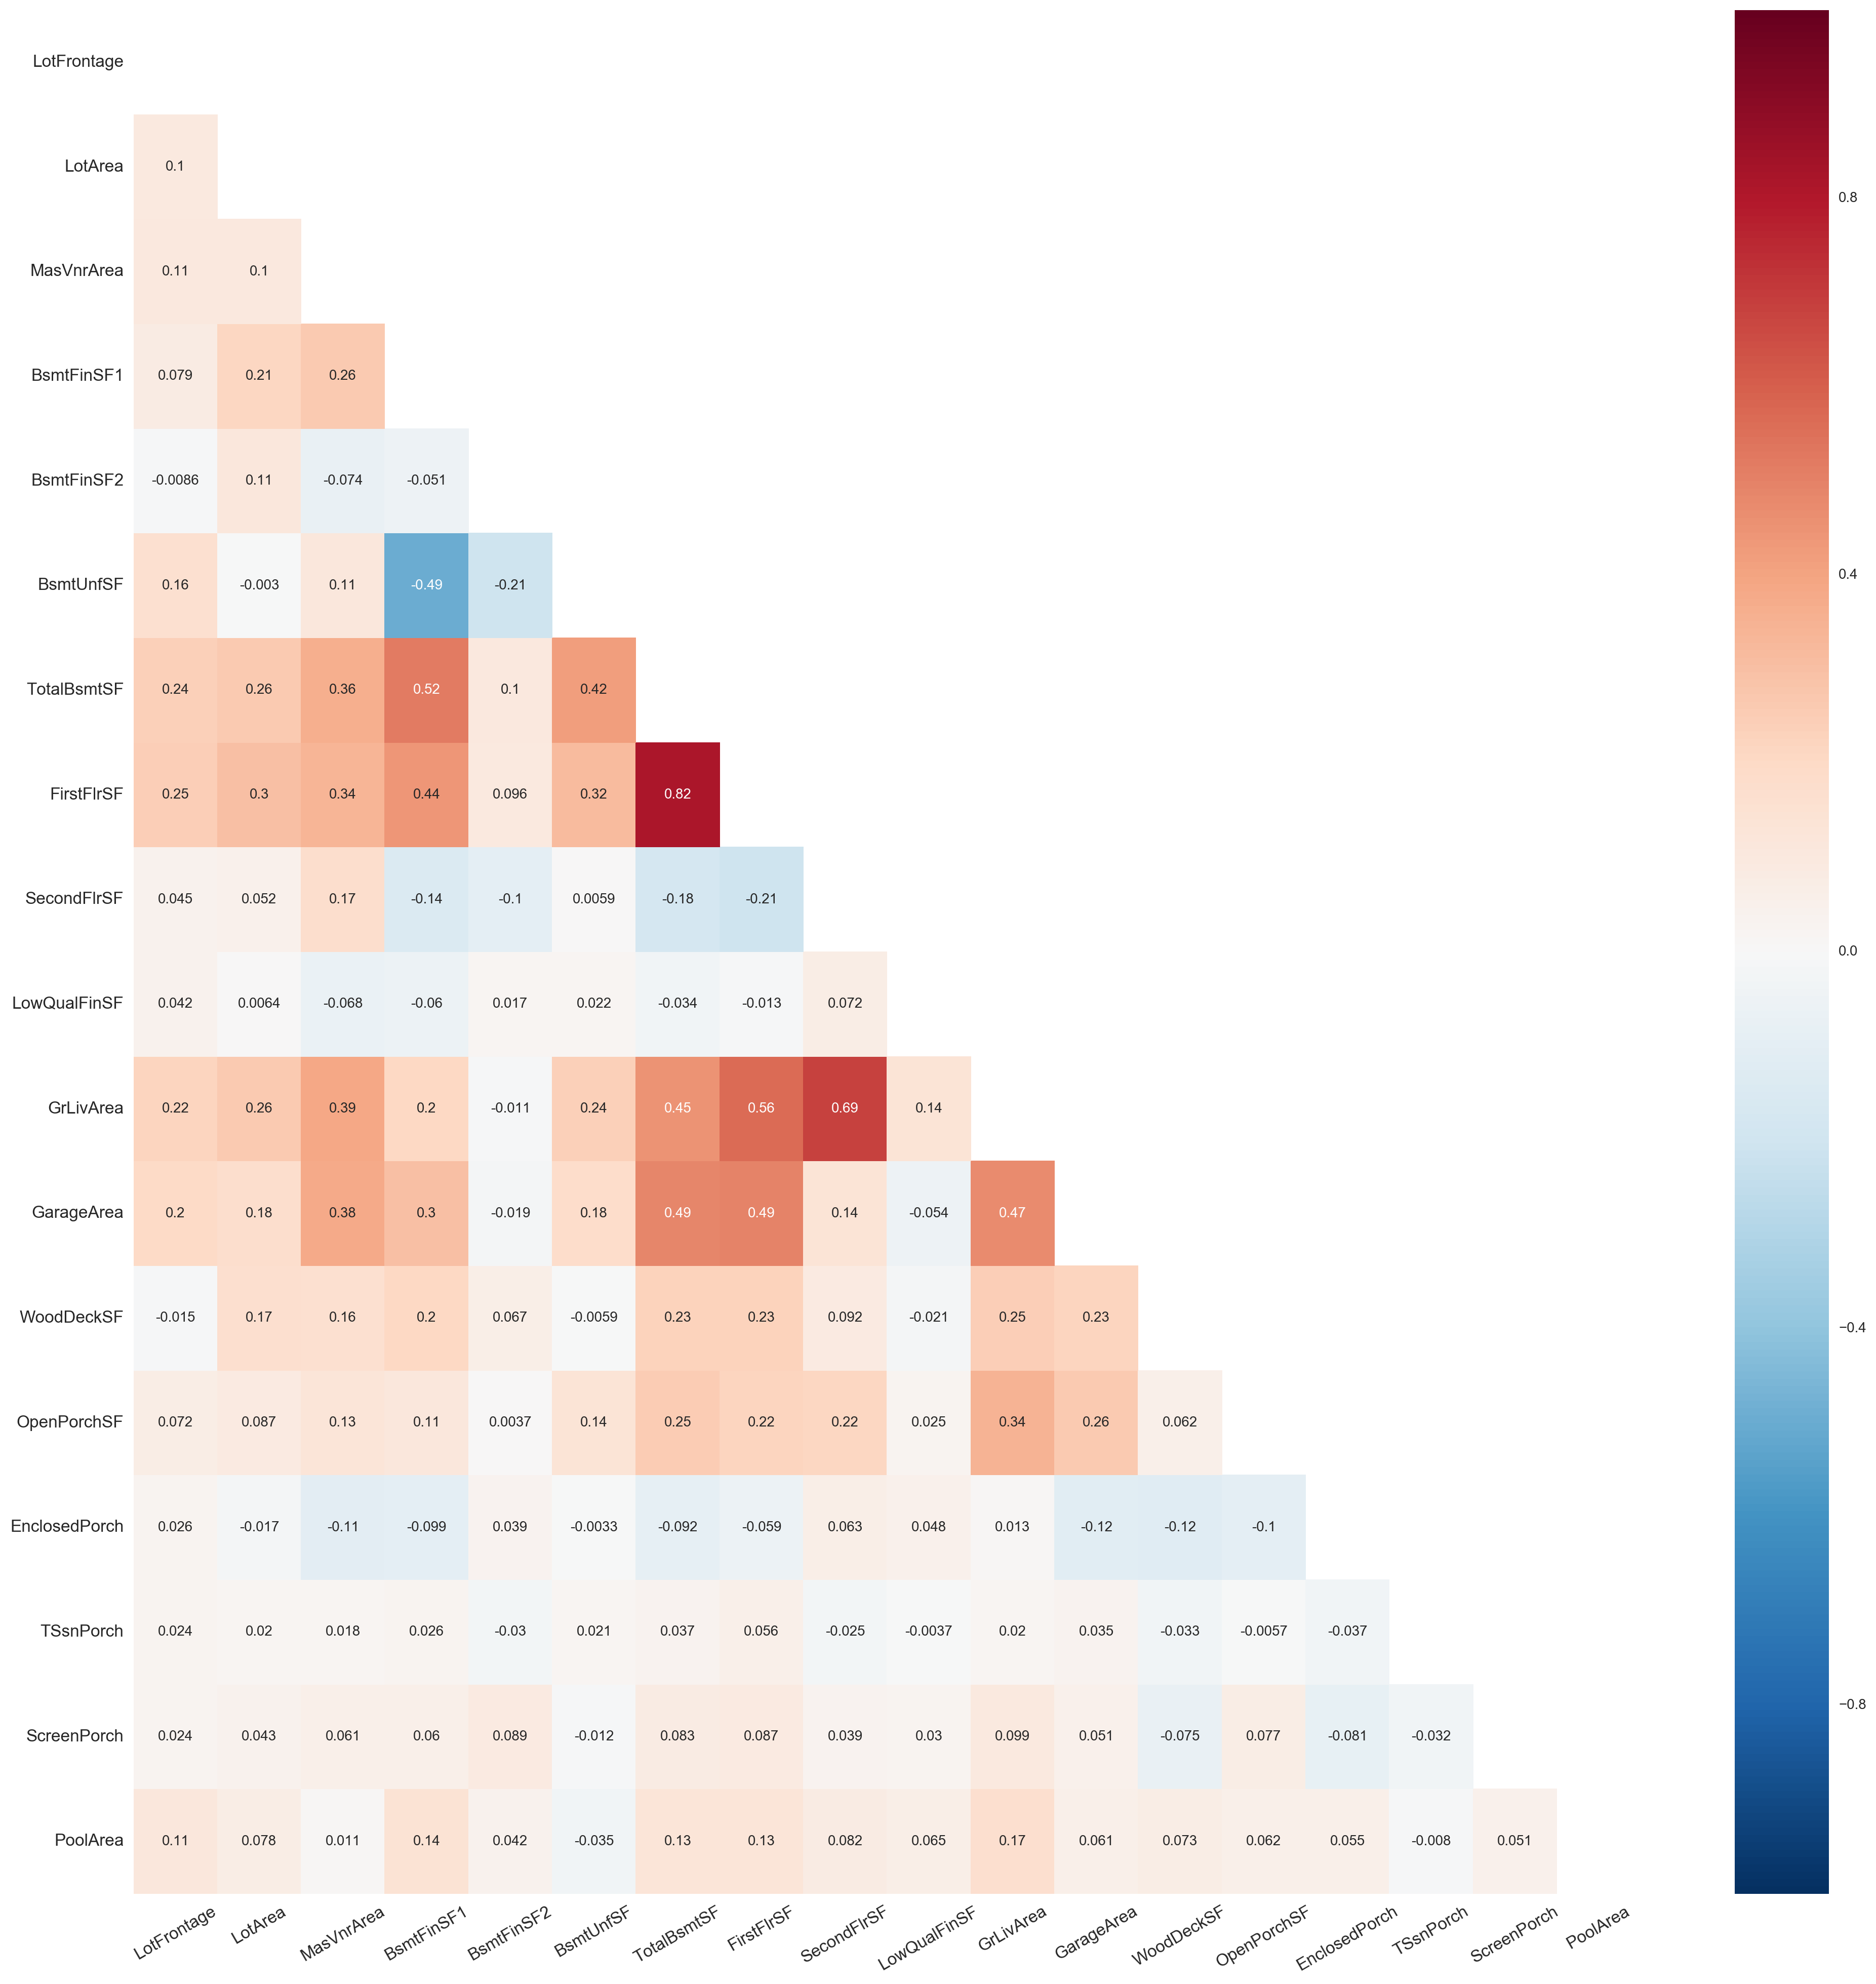

In [135]:
def correlation_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(24,24))

    
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

    
    plt.show()

correlation_heat_map(X)

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



In [137]:
from sklearn import grid_search
alphas = np.logspace(0, 200, 500)

search_parameters = {
    
    'alpha': alphas
}

ridge = Ridge()

estimator = grid_search.GridSearchCV(ridge, search_parameters, cv=5)

results = estimator.fit(X, y)


print "Best Params:"
print results.best_params_

Best Params:
{'alpha': 2587174.0785959237}


### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

In [138]:
ridge = Ridge(alpha=2587174.0785959237)

ridge_scores = cross_val_score(ridge, Xn, y, cv=10)


print 'Ridge:',np.mean(ridge_scores)

lm = LinearRegression()
model = lm.fit(Xn, y)
scores = cross_val_score(model, Xn, y, cv=10)

print "Cross-validated scores mean:", sum(scores)/len(scores)

Ridge: -0.00420661084029
Cross-validated scores mean: 0.679907547916


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

Both Ridge and LASSO solutions are indexed by the continuous
parameter λ:

Ridge:
Useful for shrinkage it uses λ to controls the size of the coefficients.
λ also controls the amount of regularization.

LASSO: 
Unlike Ridge regression, LASSO has no closed form and therefore can't zero out coefficients.
This means we either include all the coefficients in the model, or none of them. 
LASSO does both parameter shrinkage and variable selection automatically, which is very useful.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

In [160]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.0,1.0,0.005)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-160-77906d85cd97>, line 2)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**